[19296233.332024537, 13085076.499414787, 10060335.730751365, 8490938.480560213, 7638737.321801603, 7157769.583328817, 6874871.351579789, 6699220.982859507, 6581594.146221135, 6494734.659877211, 6423387.76271745, 6359023.477582902, 6296947.830998773, 6234678.4028260205, 6171011.414144577, 6105477.402474957, 6038020.17976708, 5968806.447344245, 5898112.977532805, 5826260.341306036, 5753574.761225427, 5680367.004654773, 5606921.576118377, 5533492.077737698, 5460300.194444415, 5387536.736427765, 5315363.775743526, 5243917.290614479, 5173309.96633121, 5103633.948806522, 5034963.438505333, 4967357.069108233, 4900860.049731871, 4835506.069966446, 4771318.978583463, 4708314.252825611, 4646500.277832812, 4585879.456337544, 4526449.168141399, 4468202.597608656, 4411129.445823118, 4355216.542360604, 4300448.369956008, 4246807.513760874, 4194275.045431026, 4142830.850968743, 4092453.9100718917, 4043122.5337076136, 3994814.565720966, 3947507.553497487]
[17831155.83503963, 11897345.233287796, 906646

<Figure size 2160x2880 with 0 Axes>

5.846552144199288e-05 0.2848 8.314 1.093789124779512 1.093789124779512


5627651.594207626

456.15 5620000.0


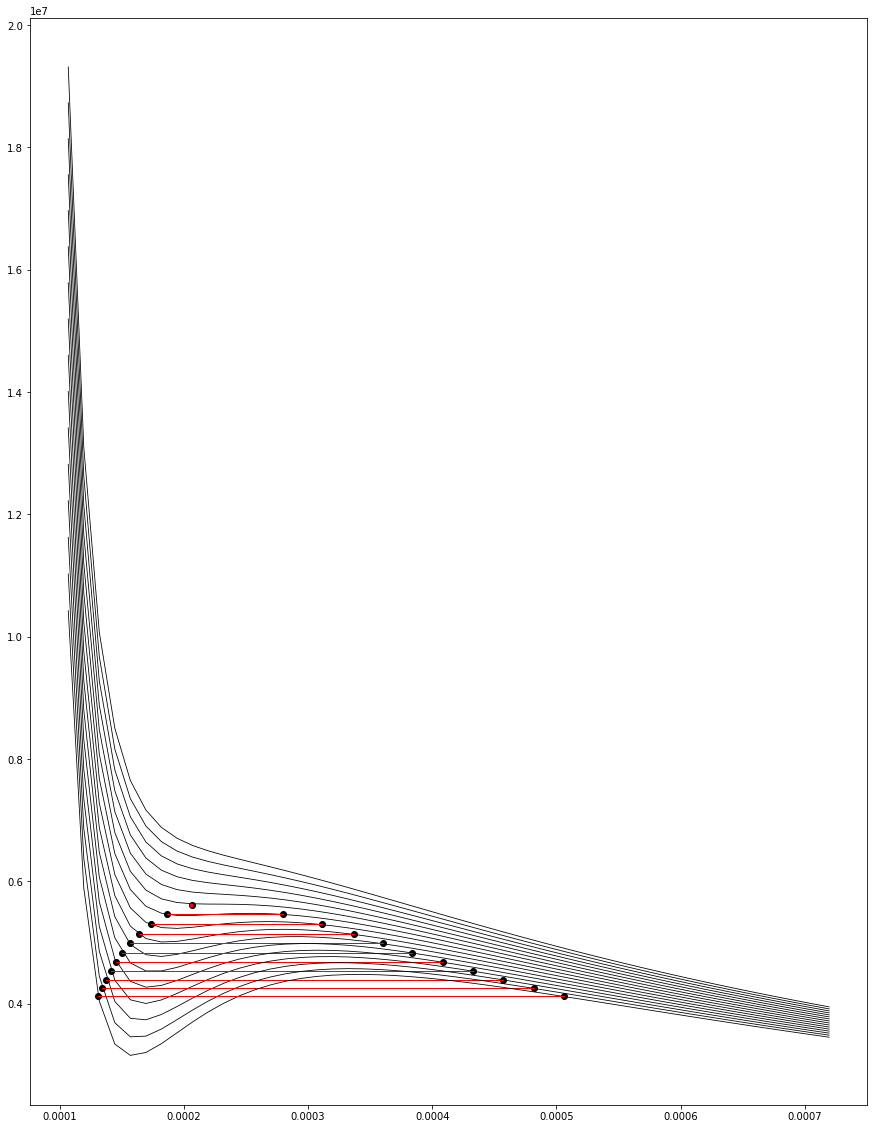

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np


Tc = 456.15
Pc = 5.62*1000000
Vc = 0.207/1000
w = 0.2848
R = 8.314

b = 0.08664*(R*Tc)/Pc
b = 5.846552144199288/100000

a = 0.4274*R*R*Tc*Tc/Pc
a = 1.093789124779512


def val(v,t):
    at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(t/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(t/Tc)))
    
    p = (R*t)/(v-b) - at/(v*(v+b))
    
    return p

T = 466.15
V = 0.107/1000
plt.figure(figsize=[15,20])
for i in range(16):
    v = [0 for jl in range(50)]
    p = [0 for kl in range(50)]
    v[0] = V
    p[0] = val(V,T)
     
    for j in range(1,50):
        
        v[j] = v[j-1] + 0.0125/1000
        
        p[j] = val(v[j],T)
    
    plt.plot(v, p , linewidth = 0.8,color='black' )  
    #print(p)
    #plt.axvline(0.000207)
    for j in range(1,49):
        pmin = 0
        if(p[j-1]>p[j] and p[j+1]>p[j]):
          pmin = p[j]
          #print(pmin)
          break
    #print(pmin)
    for j in range(1,49):
        pmax = 0
        if(p[j-1]<p[j] and p[j+1]<p[j]):
          pmax = p[j]
          break

    at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))

    if (pmin != 0 and pmax != 0):
        ps = (pmin + pmax)/2
        Gl = 1
        Gg =0 

        while ( abs(Gg-Gl)>0.0003):
            arr = list(np.roots([ps, -R*T, -R*T*b-ps*b*b+at, -at*b]))

            #print(arr)
            dg = 1/arr[0]
            dl = 1/arr[2]

            Gl = -math.log(1-dl*b) - (at/(b*R*T))*math.log(1+dl*b) + ps/(dl*R*T) - 1 -math.log(ps/(dl*R*T))
            Gg = -math.log(1-dg*b) - (at/(b*R*T))*math.log(1+dg*b) + ps/(dg*R*T) - 1 -math.log(ps/(dg*R*T))
        
            #print(Gg,Gl)

            ps = ps + 5000
        plt.plot(arr[0],ps , 'o', color='black')
        plt.plot(arr[2],ps  , 'o', color='black') 
        plt.plot([arr[2],arr[0]] , [ps,ps], linewidth=  1 ,color = 'red' )
         
        #print(Gg,Gl)
    #plt.axhline(5620000)  
    
    T = T-2


Pc = a*0.08664*0.08664/(b*b*0.4274)   
Tc = a*0.08664/(b*R*0.4274)
print(Tc,Pc)
plt.plot(Vc,Pc  , 'o', color='black')
plt.plot(0.000206,Pc  , '.', color='red')       

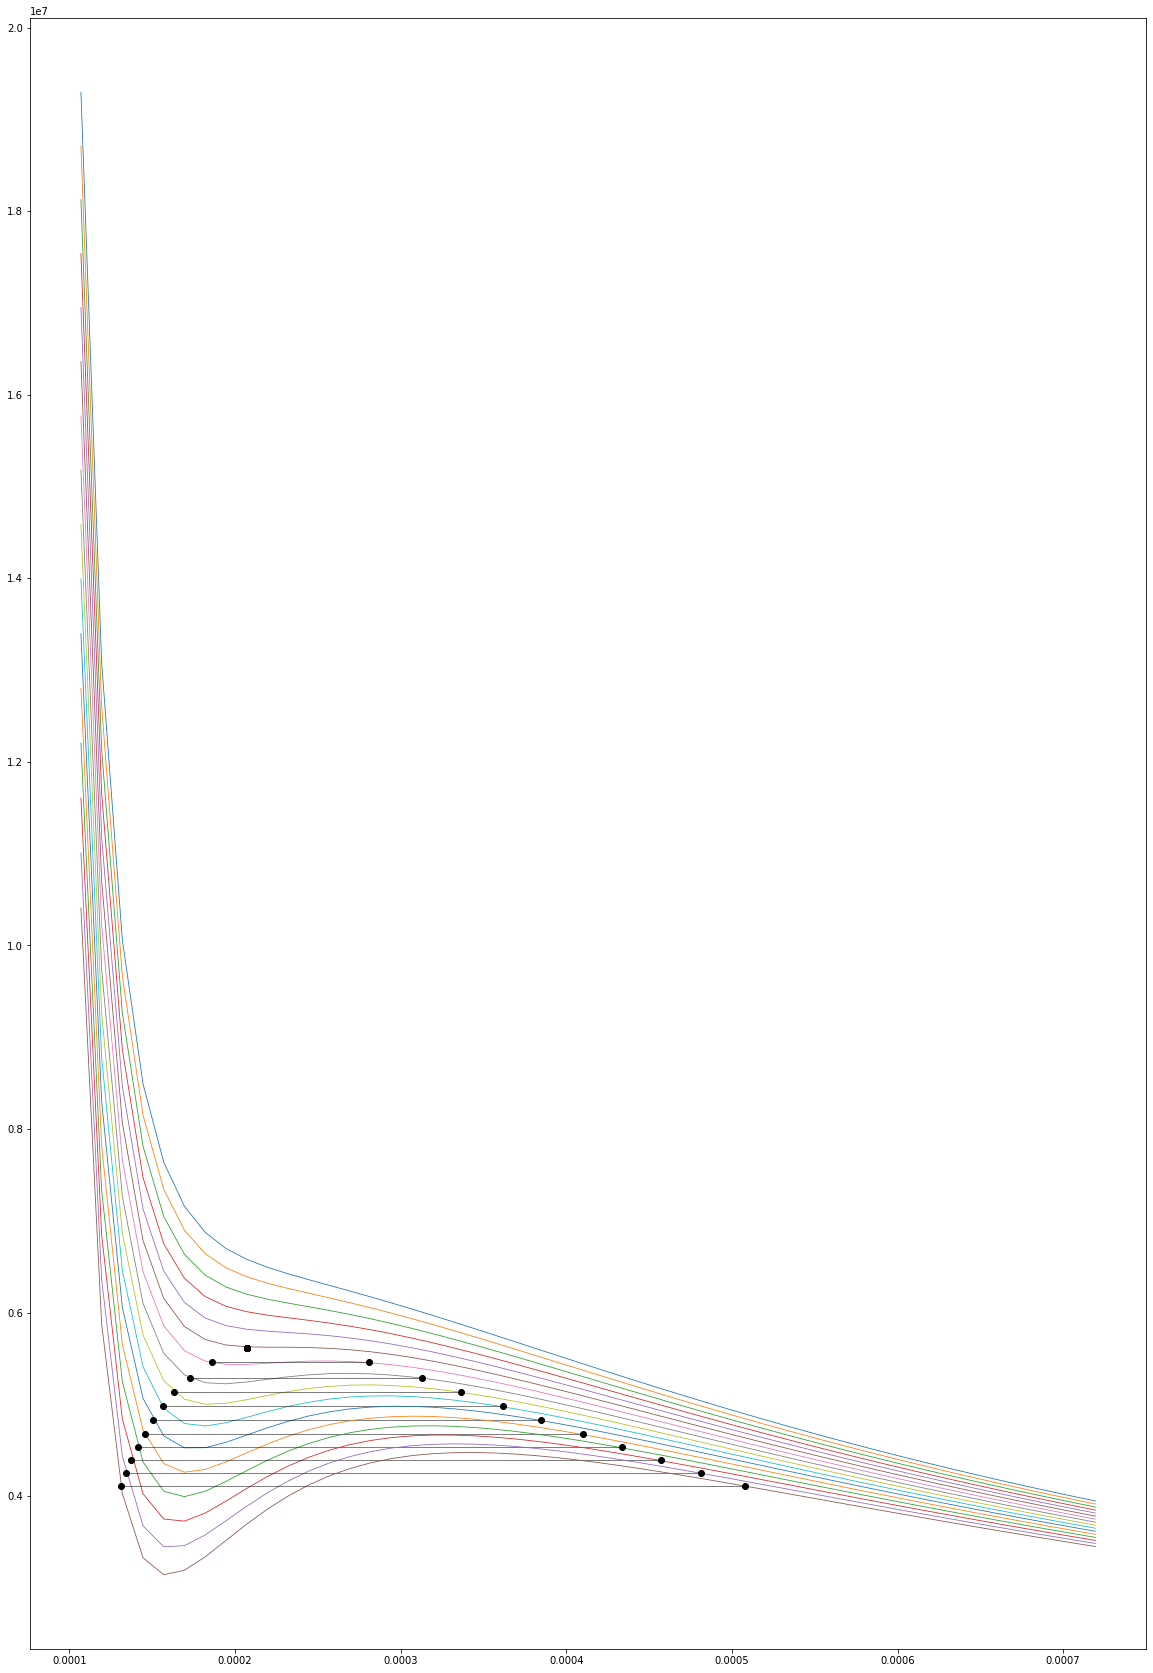

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np


Tc = 456.15
Pc = 5.62*1000000
Vc = 0.207/1000
w = 0.2848
R = 8.314

b = 0.08664*(R*Tc)/Pc
b = 5.846552144199288/100000

a = 0.4274*R*R*Tc*Tc/Pc
a = 1.093789124779512


def val(v,t):
    at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(t/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(t/Tc)))
    
    p = (R*t)/(v-b) - at/(v*(v+b))
    
    return p

T = 466.15
V = 0.107/1000
plt.figure(figsize=[20,30])
for i in range(16):
    v = [0 for jl in range(50)]
    p = [0 for kl in range(50)]
    v[0] = V
    p[0] = val(V,T)
     
    for j in range(1,50):
        
        v[j] = v[j-1] + 0.0125/1000
        
        p[j] = val(v[j],T)
    
    plt.plot(v, p , linewidth = 0.8, )  
    #print(p)
    #plt.axvline(0.000207)
    for j in range(1,49):
        pmin = 0
        if(p[j-1]>p[j] and p[j+1]>p[j]):
          pmin = p[j]
          #print(pmin)
          break
    #print(pmin)
    for j in range(1,49):
        pmax = 0
        if(p[j-1]<p[j] and p[j+1]<p[j]):
          pmax = p[j]
          break

    at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))

    if (pmin != 0 and pmax != 0):
        ps = (pmin + pmax)/2
        Gl = 1
        Gg =0 

        while ( abs(Gg-Gl)>0.0003):
            arr = list(np.roots([ps, -R*T, -R*T*b-ps*b*b+at, -at*b]))

            #print(arr)
            dg = 1/arr[0]
            dl = 1/arr[2]

            Gl = -math.log(1-dl*b) - (at/(b*R*T))*math.log(1+dl*b) + ps/(dl*R*T) - 1 -math.log(ps/(dl*R*T))
            Gg = -math.log(1-dg*b) - (at/(b*R*T))*math.log(1+dg*b) + ps/(dg*R*T) - 1 -math.log(ps/(dg*R*T))
        
            #print(Gg,Gl)

            ps = ps + 5000
        plt.plot(arr[0],ps , 'o', color='black')
        plt.plot(arr[2],ps  , 'o', color='black') 
        plt.plot([arr[2],arr[0]] , [ps,ps], linewidth=  0.5 ,color = 'black' )
        plt.plot(Vc,Pc  , 'o', color='black')    
        #print(Gg,Gl)
    #plt.axhline(5620000)  

    T = T-2


In [ ]:
Tc = 456.15
Pc = 5.62*1000000
Vc = 0.207/1000
w = 0.2848
R = 8.314

b = 0.08664*(R*Tc)/Pc

a = 0.4274*R*R*Tc*Tc/Pc

a,b

(1.093789124779512, 5.846552144199288e-05)

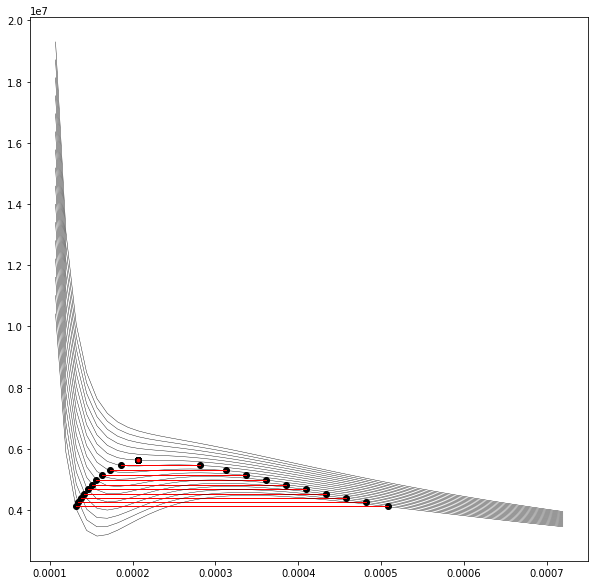

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np


Tc = 456.15
Pc = 5.62*1000000
Vc = 0.207/1000
w = 0.2848
R = 8.314

b = 0.08664*(R*Tc)/Pc
b = 5.846552144199288/100000

a = 0.4274*R*R*Tc*Tc/Pc
a = 1.093789124779512


def val(v,t):
    at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(t/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(t/Tc)))
    
    p = (R*t)/(v-b) - at/(v*(v+b))
    
    return p

T = 466.15
V = 0.107/1000
plt.figure(figsize=[10,10])
for i in range(16):
    v = [0 for jl in range(50)]
    p = [0 for kl in range(50)]
    v[0] = V
    p[0] = val(V,T)
     
    for j in range(1,50):
        
        v[j] = v[j-1] + 0.0125/1000
        
        p[j] = val(v[j],T)
    
    plt.plot(v, p , linewidth = 0.4,color = 'black' )  
    #print(p)
    #plt.axvline(0.000207)
    for j in range(1,49):
        pmin = 0
        if(p[j-1]>p[j] and p[j+1]>p[j]):
          pmin = p[j]
          #print(pmin)
          break
    #print(pmin)
    for j in range(1,49):
        pmax = 0
        if(p[j-1]<p[j] and p[j+1]<p[j]):
          pmax = p[j]
          break

    at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))

    if (pmin != 0 and pmax != 0):
        ps = (pmin + pmax)/2
        Gl = 1
        Gg =0 

        while ( abs(Gg-Gl)>0.0003):
            arr = list(np.roots([ps, -R*T, -R*T*b-ps*b*b+at, -at*b]))

            #print(arr)
            dg = 1/arr[0]
            dl = 1/arr[2]

            Gl = -math.log(1-dl*b) - (at/(b*R*T))*math.log(1+dl*b) + ps/(dl*R*T) - 1 -math.log(ps/(dl*R*T))
            Gg = -math.log(1-dg*b) - (at/(b*R*T))*math.log(1+dg*b) + ps/(dg*R*T) - 1 -math.log(ps/(dg*R*T))
        
            #print(Gg,Gl)

            ps = ps + 5000
        plt.plot(arr[0],ps , 'o', color='black')
        plt.plot(arr[2],ps  , 'o', color='black') 
        plt.plot([arr[2],arr[0]] , [ps,ps], linewidth=  1 ,color = 'red' )
        plt.plot(Vc,Pc  , 'o', color='black')
        plt.plot(Vc,Pc  , '.', color='red')
            
        #print(Gg,Gl)
    #plt.axhline(5620000)  

    T = T-2


In [ ]:
b = 0.08664*(R*Tc)/Pc
b = 5.846552144199288/100000
w= 0.2848
a = 0.4274*R*R*Tc*Tc/Pc
a = 1.093789124779512

Pc = a*0.08664*0.08664/(b*b*0.4274)   
Tc = a*0.08661/(b*R*0.4274)
print(Tc,Pc)
ps = Pc 
T = 456.02
at = a*(1+(0.480+1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))*(1+(0.480 + 1.57*w - 0.176*w*w)*(1-math.sqrt(T/Tc)))

_,_, Vc = np.roots([ps, -R*T, -R*T*b-ps*b*b+a, -a*b])

Vc

455.99205332409974 5620000.0


(0.0002075499047379223+0j)